## Bonus example - starting from scratch
When we are doing real deep learning tasks, the analysed data is not neatly included in the libraries we are using for the analysis (like Keras Datasets). In these real tasks we need to collect the data by ourselves. Organising and preprocessing these real datasets to a suitable form for the analysis can be sometimes challenging.

The purpose of this example is to introduce you to the (possible) steps needed, when you are preparing your data for a deep learning model.

For this example, we need to load the data ourselves that is somewhat laborious. We use image classification data from [www.kaggle.com/c/dogs-vs-cats](https://www.kaggle.com/c/dogs-vs-cats). Kaggle organises ML-competitions, and in this competition, the task is to distinguish dogs from cats in images.

![Pinto](./images/pinto.png)

First, we load some libraries that are needed to manipulate the image files.

In [3]:
import os,shutil

I have the original training data in the "original_data" folder (under the work folder). You can download the original data from [www.kaggle.com/c/dogs-vs-cats](https://www.kaggle.com/c/dogs-vs-cats).

In [4]:
files = os.listdir('./original_data')

The total number of dog and cat images is 25 000.

In [5]:
len(files)

25000

We do this training "by-the-book" by dividing the data to train, validation and test parts. The validation data is used to finetune the hyperparameters of a model. With separate validation data, we avoid using the hyperparameter optimisation wrongly to optimise the test data performance. Below is an example of a dataset-split that uses 3-fold cross-validation.
![Validation](./images/Train-Test-Validation.png)

The following commands build different folders for the training, validation and test data.

In [6]:
os.mkdir('train')
os.mkdir('validation')
os.mkdir('test')

Under the training, validation and test -folders we make separate folders for the dog and cat pictures. This makes it much easier to use Keras data-generation function as it can automatically collect observations of different classes from different folders. **os.path.join()** -function makes it easy to build directory structures. You add the "parts" of the directory structure, and it will add automatically slashes when needed.

In [7]:
# Get the current work directory
base_dir = os.getcwd()

In [8]:
# Dogs
os.mkdir(os.path.join(base_dir,'train','dogs'))
os.mkdir(os.path.join(base_dir,'validation','dogs'))
os.mkdir(os.path.join(base_dir,'test','dogs'))
# Cats
os.mkdir(os.path.join(base_dir,'train','cats'))
os.mkdir(os.path.join(base_dir,'validation','cats'))
os.mkdir(os.path.join(base_dir,'test','cats'))

Next, we copy the files to correct folders. We use only part of the data to speed up calculations: 3000 images for the training, 1000 images for the validation and 1000 images for the testing. The first command in each cell constructs a list of correct filenames. It uses Python's list comprehension, that is a great feature in Python.

Let's analyse the first one (**fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]**):

When we put a for loop inside square brackets, Python will generate a list that has the "rounds" of a loop as values in the list.

**'dog.{}.jpg'.format(i)** - This is the part that will be repeated in the list so that the curly brackets are replaced by the value of **i**.

**for i in range(1500)** - This will tell what values are inserted in **i**. **range(1500)** just means values from 0 to 1500.

More information about list comprehension can be found from https://docs.python.org/3/tutorial/datastructures.html (section 5.1.3)

In [9]:
# Train dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'train','dogs',file)
    shutil.copyfile(src,dst)

In [10]:
# Validation dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'validation','dogs',file)
    shutil.copyfile(src,dst)

In [11]:
# Test dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(2000,2500)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'test','dogs',file)
    shutil.copyfile(src,dst)

In [12]:
# Train cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'train','cats',file)
    shutil.copyfile(src,dst)

In [13]:
# Validation cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'validation','cats',file)
    shutil.copyfile(src,dst)

In [14]:
# Test cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for file in fnames:
    src = os.path.join(base_dir,'original_data',file)
    dst = os.path.join(base_dir,'test','cats',file)
    shutil.copyfile(src,dst)

Next, we check that everything went as planned. The dog folders should have 1500,500 and 500 images and similarly to the cat folders.

In [15]:
# Check the dog directories
print(len(os.listdir(os.path.join(base_dir,'train','dogs'))))
print(len(os.listdir(os.path.join(base_dir,'validation','dogs'))))
print(len(os.listdir(os.path.join(base_dir,'test','dogs'))))

1500
500
500


In [16]:
# Check the cat directories
print(len(os.listdir(os.path.join(base_dir,'train','cats'))))
print(len(os.listdir(os.path.join(base_dir,'validation','cats'))))
print(len(os.listdir(os.path.join(base_dir,'test','cats'))))

1500
500
500


### Simple CNN model

As our preliminary model, we test a basic CNN model with four convolutional layers and four max-pooling layers followed by two dense layers with 12544 (flatten) and 512 neurons. The output layer has one neuron with a sigmoid activation function. So, the output is a prediction for one of the two classes.

First, we need the **layers** and **models** -modules from Keras.

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models

Next, we define a sequential model and add layers using the **add()**-function.

In [18]:
model = models.Sequential()

The input images to the network are 150x150 pixel RGB images. The size of the convolution-filter is 3x3, and the layer produces 32 feature maps. The ReLU activation function is the common choice with CNNs (and many other neural network types).

In [19]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

A max-pooling layer with a 2x2 window.

In [20]:
model.add(layers.MaxPooling2D((2, 2)))

Notice how the number of feature maps is increasing.

In [21]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
model.add(layers.MaxPooling2D((2, 2)))

In [23]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [24]:
model.add(layers.MaxPooling2D((2, 2)))

In [25]:
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

In [26]:
model.add(layers.MaxPooling2D((2, 2)))

In [27]:
model.add(layers.Flatten())

In [28]:
model.add(layers.Dense(512, activation='relu'))

In [29]:
model.add(layers.Dense(1, activation='sigmoid'))

Overall, we have almost 7 million parameters in our model, which is way too much for a training set with 3000 images. The model will overfit as we will soon see from the results.
![First_CNN](./images/nn.png)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [31]:
from tensorflow.keras import optimizers

Next, we compile the model. Because we have now two classes, "binary_crossentropy" is the correct loss_function. There are many gradient descent optimisers available, but usually, RMSprop works very well. More information about RMSprop can be found here: https://keras.io/api/optimizers/rmsprop/.

![grad_desc](./images/Gradient_descent.gif)

We measure performance with the accuracy metric.

In [32]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

To get images from a folder to a CNN model can be a very tedious task. Luckily, Keras has functions that make our job much more straightforward.

**ImageDataGenerator** is a Python generator that can be used to transform images from a folder to tensors that can be fed to a neural network model.

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We scale the pixel values from 0-255 to 0-1. Remember: neural networks like small values.

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

We change the size of the images to 150 x 150 and collect them in 25 batches. Basically, we feed (25,150,150,3)-tensors to the model. As you can see, the function automatically recognises two different classes. It is because we placed the cat and dog images to two different folders. We have to make separate generators for the training data and the validation data.

In [35]:
train_generator = train_datagen.flow_from_directory(os.path.join(base_dir,'train'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 3000 images belonging to 2 classes.


In [36]:
validation_generator = train_datagen.flow_from_directory(os.path.join(base_dir,'validation'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


We use a little bit longer training with 30 epochs. Instead of input data, we now give the generators to the model. Also, we separately define the validation generator and validation testing steps. With 25 image batches and 120 steps per epoch, we go through all the 3000 images. To **history**, we save the training progress details.

In [37]:
history = model.fit(train_generator,
                              steps_per_epoch=120,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=40)

Epoch 1/30
120/120 [==============================] - 30s 242ms/step - loss: 1.1536 - acc: 0.5054 - val_loss: 0.6858 - val_acc: 0.5140
Epoch 2/30
120/120 [==============================] - 22s 182ms/step - loss: 0.6779 - acc: 0.5652 - val_loss: 0.6450 - val_acc: 0.5970
Epoch 3/30
120/120 [==============================] - 22s 180ms/step - loss: 0.6601 - acc: 0.6260 - val_loss: 0.6499 - val_acc: 0.6480
Epoch 4/30
120/120 [==============================] - 22s 180ms/step - loss: 0.5894 - acc: 0.6766 - val_loss: 0.6674 - val_acc: 0.6730
Epoch 5/30
120/120 [==============================] - 22s 182ms/step - loss: 0.5287 - acc: 0.7391 - val_loss: 0.5743 - val_acc: 0.7050
Epoch 6/30
120/120 [==============================] - 22s 181ms/step - loss: 0.4937 - acc: 0.7739 - val_loss: 0.6369 - val_acc: 0.7050
Epoch 7/30
120/120 [==============================] - 22s 182ms/step - loss: 0.4594 - acc: 0.7848 - val_loss: 0.5385 - val_acc: 0.7270
Epoch 8/30
120/120 [==============================] - 2

Let's check how did it go. In a typical overfitting situation, training accuracy quickly rises to almost 1.0 and validation accuracy stalls to a much lower level. This is also the case here. The training accuracy is 0.984, and the validation accuracy is around 0.72.
But still, not that bad! The model recognises cats and dogs correctly from the images 72 % of the time.

![Overfitting](./images/Overfitting.svg)

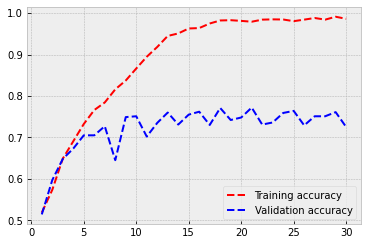

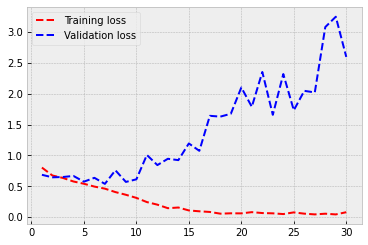

In [38]:
import matplotlib.pyplot as plt # Load plotting libraries
plt.style.use('bmh') # bmh-style is usually nice
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.legend() # Matplotlib will automatically position the legend in a best possible way.
plt.figure() # This is needed to make two separate figures for loss and accuracy.
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

#### Augmentation and regularisation

Let's try to improve our model. Augmentation is a common approach to "increase" the amount of data. The idea of augmentation is to transform images slightly every time they are fed to the model. Thus, we are trying to create new information to the model to train on. However, we are not truly creating new information. Nevertheless, augmentation has proven to be an efficient way to improve results.

Image transformation can be implemented to the **ImageDataGenerator()**-function. There are many parameters that can be used to transform images. More information: [keras.io/api/preprocessing/image/](https://keras.io/api/preprocessing/image/)

In [39]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

Let's check what kind of images we are analysing.

In [40]:
# Image -module to view images
from tensorflow.keras.preprocessing import image

In [41]:
# We pick the 16th image from the train/dogs -folder.
img_path = os.path.join(base_dir,'train','dogs',os.listdir(os.path.join(base_dir,'train','dogs'))[16])

In [42]:
sample_image = image.load_img(img_path, target_size=(150, 150))

Below is an example image from the original dataset. The sixteenth image in our list.

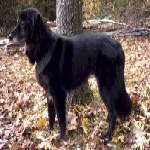

In [43]:
sample_image

To use the Imagedatagenerator's **flow()**-function, we need to transform our image to a numpy-array.

In [44]:
sample_image_np = image.img_to_array(sample_image)
sample_image_np = sample_image_np.reshape((1,) + sample_image_np.shape)

The following code transforms images using *ImageDataGenerator()* and plots eight examples. As you can see, they are slightly altered images that are very close to the original image.

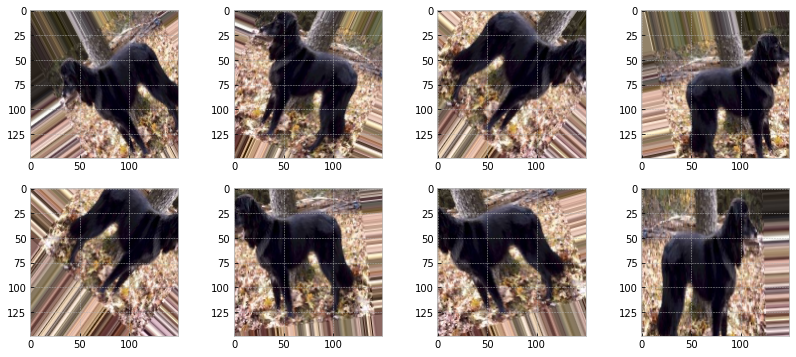

In [45]:
fig, axs = plt.subplots(2,4,figsize=(14,6),squeeze=True)
i=0
for ax,transform in zip(axs.flat,datagen.flow(sample_image_np, batch_size=1)):
    ax.imshow(image.array_to_img(transform[0]))
    i+=1
    if i%8==0:
        break

Next, we define the model. Alongside augmentation, we add regularisation to the model with a dropout-layer. The Dropout layer randomly sets input units to 0 with a frequency of **rate** (0.5 below) at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

We build our sequential model using **add()**-functions. The only difference, when compared to the previous model, is the dropout-layer after the flatten-layer (and the augmentation).

In [46]:
model = models.Sequential()

In [47]:
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The dropout layer does not change the number of parameters. It is exactly the same as in the previous model.

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

The compile-step is not changed.

In [49]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

We create the augmentation-enabled generators. Remember that the validation dataset should not be augmented!

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [51]:
validation_datagen = ImageDataGenerator(rescale=1./255)

The same dataset of 3000 training images and 1000 validation images.

In [52]:
train_generator = train_datagen.flow_from_directory(os.path.join(base_dir,'train'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 3000 images belonging to 2 classes.


In [53]:
validation_generator = validation_datagen.flow_from_directory(os.path.join(base_dir,'validation'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


Otherwise, the parameters to the **model.fit()** are the same as in the previous model, but we train the model a little bit longer. This is because regularisation slows down training.

In [54]:
history = model.fit(train_generator,
                              steps_per_epoch=120,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=40)

Epoch 1/50
120/120 [==============================] - 25s 208ms/step - loss: 0.7414 - acc: 0.5106 - val_loss: 0.6894 - val_acc: 0.5240
Epoch 2/50
120/120 [==============================] - 25s 208ms/step - loss: 0.6794 - acc: 0.5682 - val_loss: 0.6630 - val_acc: 0.5560
Epoch 3/50
120/120 [==============================] - 25s 206ms/step - loss: 0.6665 - acc: 0.6169 - val_loss: 0.6329 - val_acc: 0.6480
Epoch 4/50
120/120 [==============================] - 25s 206ms/step - loss: 0.6376 - acc: 0.6395 - val_loss: 0.7231 - val_acc: 0.5270
Epoch 5/50
120/120 [==============================] - 25s 206ms/step - loss: 0.6247 - acc: 0.6450 - val_loss: 0.5788 - val_acc: 0.6990
Epoch 6/50
120/120 [==============================] - 25s 206ms/step - loss: 0.6250 - acc: 0.6423 - val_loss: 0.5785 - val_acc: 0.6950
Epoch 7/50
120/120 [==============================] - 25s 207ms/step - loss: 0.6112 - acc: 0.6518 - val_loss: 0.5708 - val_acc: 0.7100
Epoch 8/50
120/120 [==============================] - 2

As you can see from the following figure, overfitting has almost disappeared. The training and validation accuracy stay approximately at the same level through the training. The performance is also somewhat better. Now we achieve a validation accuracy of 0.77.

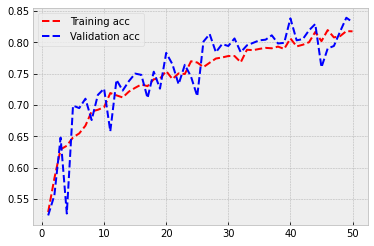

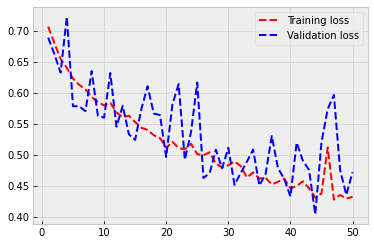

In [55]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

### Pre-trained model

Next thing that we could try is to use a pre-trained model that has its parameters already optimised using some other dataset. Usually, CNNs related to computer vision are pre-trained using Imagenet data (http://www.image-net.org/). It is a vast collection of labelled images.

We add our own layers after the pre-trained architecture. As our pre-trained model, we use VGG16

![VGG16](./images/vgg.png)

VGG16 is included in the **keras.applications** -module

In [56]:
from tensorflow.keras.applications import VGG16

When we load the VGG16 model, we need to set **weights=imagenet** to get pre-trained parameter weights. **include_top=False** removes the output layer with 1000 neurons. We want our output layer to have only one neuron (prediction for dog/cat).

In [57]:
pretrained_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 17s 0us/step


VGG16 has 14.7 million parameters without the last layer. It also has two or three convolutional layers in a row. Our previous models were switching between a convolutional layer and a max-pooling layer.

In [58]:
pretrained_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [59]:
model = models.Sequential()

When we construct the model, we add the pre-trained VGG16-base first. Then follows a 256-neuron Dense-layer and a one-neuron output layer.

In [60]:
model.add(pretrained_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Overall, our model has almost 17 million parameters. However, we will lock the pre-trained VGG16 base, which will decrease the number of trainable parameters significantly.

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


We want to use the pretrained Imagenet-weights, so, we lock the weights of the VGG16 -part.

In [62]:
pretrained_base.trainable = False

Now there is "only" two million trainable parameters.

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Again, we use the augmentation of the training dataset.

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [65]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [66]:
train_generator = train_datagen.flow_from_directory(os.path.join(base_dir,'train'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 3000 images belonging to 2 classes.


In [67]:
validation_generator = validation_datagen.flow_from_directory(os.path.join(base_dir,'validation'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


Compile- and fit-steps do not have anything new.

In [68]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                              steps_per_epoch=120,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=40)

As you can see from the plots below, there is a small overfitting issue. The difference between the training accuracy and the validation accuracy increases slowly. However, the performance is excellent! Now our model can separate dogs from cats correctly 85 % of the time.

In [ ]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

### Fine tuning

There is still (at least) one thing that we can do to improve our model. We can finetune our pre-trained VGG16 model by opening part of its' weights. As our VGG16 is now optimised for Imagenet data, the weights have information about features that are useful for many different types of images. By opening the last few layers of the model, we allow it to finetune those weights to features that are useful in separating dogs from cats in images.

First, we need to make our VGG16 model trainable again.

In [ ]:
pretrained_base.trainable = True

Here is the summary of the VGG16 model again.

In [ ]:
pretrained_base.summary()

Let' lock everything else, but leave the layers of **block5** to be finetuned by our dogs/cats images. The following code will go through the VGG16 structure, lock everything until 'block4_pool' and leave layers after that trainable.

In [ ]:
set_trainable = False
for layer in pretrained_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

There are over 9 million trainable parameters, which can probably cause overfitting, but let's see.

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                              steps_per_epoch=120,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=40)

As you can see, overfitting starts to be an issue again. But our validation performance is outstanding! The model is correct 90 % of the time.

In [ ]:
plt.style.use('bmh')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.legend()
plt.show()

As the last step, let's check the model's performance with the test set.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(os.path.join(base_dir,'test'),
                                                    target_size=(150, 150),
                                                    batch_size=25,
                                                    class_mode='binary')

In [ ]:
model.evaluate(test_generator)

Our model is correct 90 % of the time!

![thumbs](./images/thumbs.jpeg)